In [1]:
import eikon as ek
import pandas as pd
import matplotlib as plt

In [2]:
with open('../key.txt', 'r') as file:
    key = file.read()
print(key)

db3b24135a174fb98684d4e21dbd7c7f46671263


In [3]:
ek.set_app_key(key)

In [7]:
Hourly = ek.get_timeseries(['VOD.L'], fields=['Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval='hour')
Daily = ek.get_timeseries(['VOD.L'], fields=['Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval='daily')
Weekly = ek.get_timeseries(['VOD.L'], fields=['Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval='weekly')
Monthly = ek.get_timeseries(['VOD.L'], fields=['Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval='monthly')


In [8]:
Hourly.tail()

VOD.L,CLOSE
Date,
2019-03-26 14:00:00,142.99000
2019-03-26 15:00:00,142.78000
2019-03-26 16:00:00,142.60000
2019-03-26 17:00:00,142.34000
2019-03-26 18:00:00,141.39794


In [10]:
FourHour = Hourly.resample('4H').last().dropna()
FourHour.head()

VOD.L,CLOSE
Date,
2018-11-13 16:00:00,155.16
2018-11-14 08:00:00,157.72
2018-11-14 12:00:00,159.22
2019-01-07 08:00:00,156.30
2019-01-07 12:00:00,157.30


In [13]:
framelist = ['Hourly', 'FourHour', 'Daily', 'Weekly', 'Monthly']

for frame in framelist:
    vars()[frame]['MAV20'] = vars()[frame]['CLOSE'].rolling(window=20).mean()
    vars()[frame]['MAV50'] = vars()[frame]['CLOSE'].rolling(window=50).mean()
    vars()[frame]['MAV100'] = vars()[frame]['CLOSE'].rolling(window=100).mean()
Hourly.tail()

VOD.L,CLOSE,MAV20,MAV50,MAV100
Date,,,,
2019-03-26 14:00:00,142.99000,142.874698,144.990059,143.559830
2019-03-26 15:00:00,142.78000,142.771698,144.932059,143.592030
2019-03-26 16:00:00,142.60000,142.632849,144.872459,143.624030
2019-03-26 17:00:00,142.34000,142.547860,144.791659,143.662230
2019-03-26 18:00:00,141.39794,142.407757,144.679218,143.686809


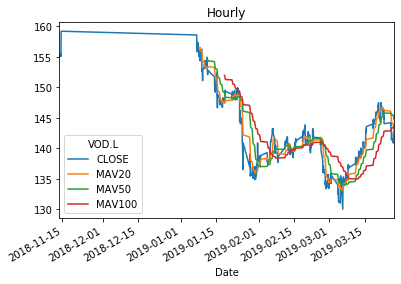

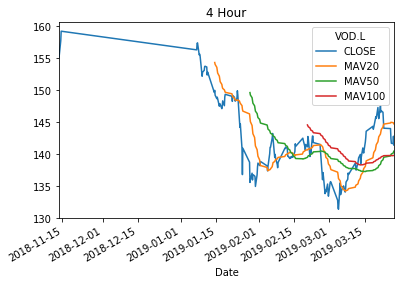

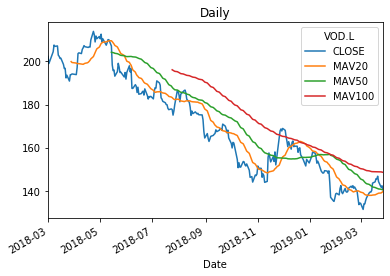

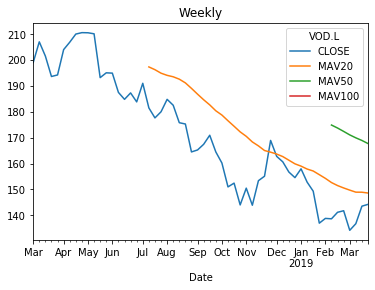

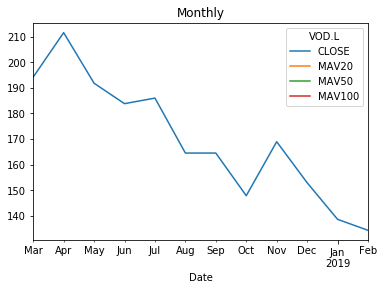

In [14]:
%matplotlib inline
Hourly.plot(title='Hourly')
FourHour.plot(title='4 Hour')
Daily.plot(title='Daily')
Weekly.plot(title='Weekly')
Monthly.plot(title='Monthly')

In [15]:
oneXN = ek.get_timeseries('VOD.L', fields = '*', start_date = '2018-03-01', end_date = '2019-03-27', interval='daily')
oneXN.tail()

VOD.L,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2019-03-21,147.8501,144.3242,144.84,146.76,13473.0,61076355.0
2019-03-22,147.0000,144.2600,146.46,144.26,16643.0,81299510.0
2019-03-25,144.5000,141.2200,144.20,141.68,14027.0,101103443.0
2019-03-26,143.2400,140.3600,141.00,142.34,12094.0,59139211.0
2019-03-27,143.8600,139.6200,143.86,140.80,15157.0,86556236.0


In [16]:
NXone = ek.get_timeseries(['BARC.L'], 'Close', start_date = '2018-03-01', end_date = '2019-03-27', interval = 'daily')
NXone.tail()

BARC.L,CLOSE
Date,
2019-03-21,160.58
2019-03-22,155.44
2019-03-25,155.54
2019-03-26,153.30
2019-03-27,155.54


In [17]:
NxN = ek.get_timeseries(['BARC.L', 'VOD.L'], fields = ['Open', 'High', 'Low', 'Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval = 'daily')
NxN.tail()

Security    BARC.L                           VOD.L                            
Field         OPEN    HIGH     LOW   CLOSE    OPEN      HIGH       LOW   CLOSE
Date                                                                          
2019-03-21  163.78  164.20  160.22  160.58  144.84  147.8501  144.3242  146.76
2019-03-22  160.46  162.00  155.00  155.44  146.46  147.0000  144.2600  144.26
2019-03-25  155.40  156.54  153.38  155.54  144.20  144.5000  141.2200  141.68
2019-03-26  155.56  156.16  152.80  153.30  141.00  143.2400  140.3600  142.34
2019-03-27  154.62  157.82  153.40  155.54  143.86  143.8600  139.6200  140.80

In [23]:
norm = ek.get_timeseries(['BARC.L', 'VOD.L'], fields = ['Open', 'High', 'Low', 'Close'], start_date = '2018-03-01', end_date = '2019-03-27', interval = 'daily', normalize = True)
norm.head()

,Date,Security,Field,Value
0,2018-03-01,BARC.L,OPEN,211.250
1,2018-03-01,BARC.L,HIGH,213.250
2,2018-03-01,BARC.L,LOW,210.312
3,2018-03-01,BARC.L,CLOSE,211.250
4,2018-03-02,BARC.L,OPEN,208.900
